In [1]:
###########import packages##########
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import ensemble
from sklearn.tree import ExtraTreeRegressor
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
import shap
import joblib
import warnings
from sklearn.metrics import r2_score
%matplotlib inline
###########wrapping root mean square error for later calls##########
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
###########loading data##########
fdata=pd.read_csv('finaldatabase.csv',encoding="utf-8")
raw_data=fdata.loc[:,[                     
    'xN2a_in0',#0
    'RH_CC',#1
    'dela_CH (mm)',#2
    'dela_M (um)',#3
    'dela_GDL (um)',#4
    'p_A (atm)',#5
    'T_cc (K)',#6
    'E cell (V)',#7
    'current',#8
    'fyN2',#9
                        ]]
###########train test splitting##########
standardized_data = (raw_data-np.mean(raw_data,axis=0))/np.std(raw_data,axis=0)
raw_input=raw_data.iloc[:,0:8]
raw_output=raw_data.iloc[:,9]*1e15
###########fix random seed for reproducability##########
seed=1
X_train, X_test, y_train, y_test = train_test_split(raw_input, raw_output, test_size=.15,random_state=seed)
y_test_values=y_test.values.astype(np.float32)


Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator AdaBoostRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.


可决系数 r2_score_current:  0.9299473663794352
方差 rmse_val： 0.27830310493739346


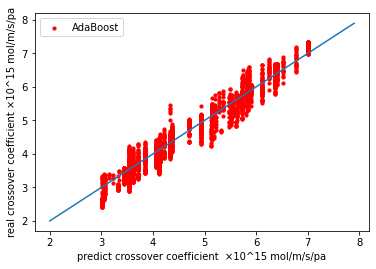

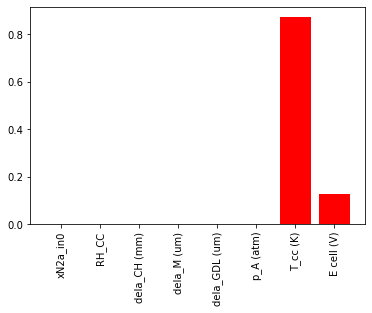

[0.00000000e+00 9.63007211e-04 0.00000000e+00 6.12998883e-04
 0.00000000e+00 5.20076999e-04 8.71433879e-01 1.26470038e-01]


In [2]:


ada_model=joblib.load('ada_model')
algorithm_name='AdaBoost'
result = ada_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(2,8,0.1)
x_y_y=np.arange(2,8,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict crossover coefficient  ×10^15 mol/m/s/pa")
plt.ylabel(u"real crossover coefficient ×10^15 mol/m/s/pa")
plt.savefig('%s Crossover coefficient Regression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(ada_model.feature_importances_)), ada_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(ada_model.feature_importances_)



In [28]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

可决系数 r2_score_current:  0.999875958790466
方差 rmse_val： 0.012976860289746189


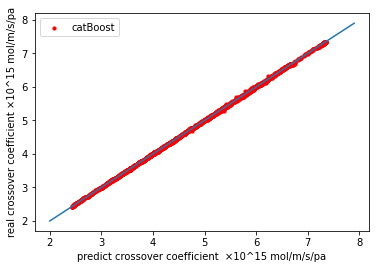

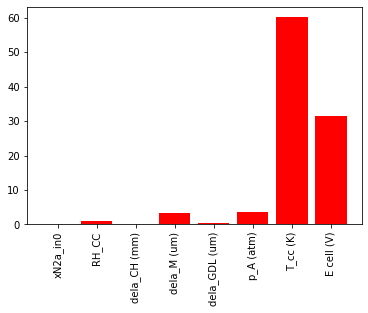

[1.13457273e-01 1.00015256e+00 4.03195545e-02 3.25203087e+00
 2.94763816e-01 3.64697151e+00 6.01197710e+01 3.15325334e+01]


In [29]:


cat_model=joblib.load('cat_model')
algorithm_name='catBoost'
result = cat_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(2,8,0.1)
x_y_y=np.arange(2,8,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict crossover coefficient  ×10^15 mol/m/s/pa")
plt.ylabel(u"real crossover coefficient ×10^15 mol/m/s/pa")
plt.savefig('%s Crossover coefficient Regression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(cat_model.feature_importances_)), cat_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(cat_model.feature_importances_)



可决系数 r2_score_current:  0.9998063149212775
方差 rmse_val： 0.016209240910904237


Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.


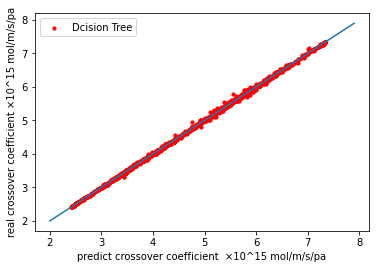

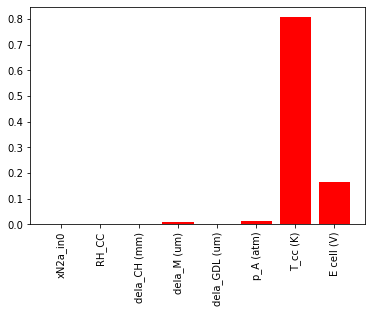

[2.91038054e-04 2.86574938e-03 7.82668781e-04 1.01522132e-02
 1.54088814e-03 1.25705155e-02 8.06677157e-01 1.65119770e-01]


In [30]:


dt_model=joblib.load('dt_model')
algorithm_name='Dcision Tree'
result = dt_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(2,8,0.1)
x_y_y=np.arange(2,8,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict crossover coefficient  ×10^15 mol/m/s/pa")
plt.ylabel(u"real crossover coefficient ×10^15 mol/m/s/pa")
plt.savefig('%s Crossover coefficient Regression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(dt_model.feature_importances_)), dt_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(dt_model.feature_importances_)



可决系数 r2_score_current:  0.9998063149212775
方差 rmse_val： 0.016209240910904237


Trying to unpickle estimator ExtraTreeRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.


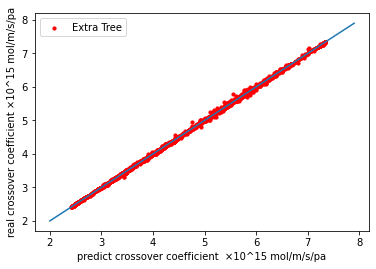

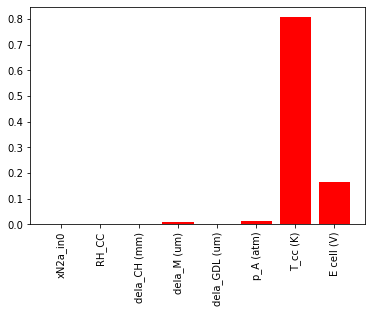

[2.91038054e-04 2.86574938e-03 7.82668781e-04 1.01522132e-02
 1.54088814e-03 1.25705155e-02 8.06677157e-01 1.65119770e-01]


In [31]:


et_model=joblib.load('et_model')
algorithm_name='Extra Tree'
result = et_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(2,8,0.1)
x_y_y=np.arange(2,8,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict crossover coefficient  ×10^15 mol/m/s/pa")
plt.ylabel(u"real crossover coefficient ×10^15 mol/m/s/pa")
plt.savefig('%s Crossover coefficient Regression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(et_model.feature_importances_)), et_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(et_model.feature_importances_)



可决系数 r2_score_current:  0.9969995835049779
方差 rmse_val： 0.06357743639280984


Trying to unpickle estimator DummyRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator GradientBoostingRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.


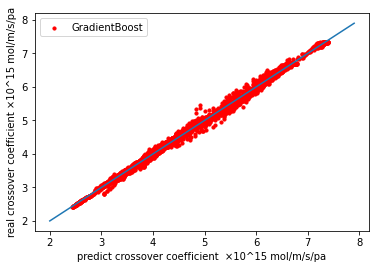

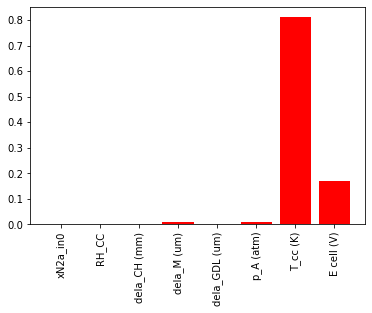

[8.58345649e-05 2.62969414e-03 1.06916306e-04 1.02566835e-02
 4.81419860e-04 7.59479696e-03 8.10524824e-01 1.68319830e-01]


In [32]:


gdb_model=joblib.load('gdb_model')
algorithm_name='GradientBoost'
result = gdb_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(2,8,0.1)
x_y_y=np.arange(2,8,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict crossover coefficient  ×10^15 mol/m/s/pa")
plt.ylabel(u"real crossover coefficient ×10^15 mol/m/s/pa")
plt.savefig('%s Crossover coefficient Regression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(gdb_model.feature_importances_)), gdb_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(gdb_model.feature_importances_)



可决系数 r2_score_current:  0.9996815383315352
方差 rmse_val： 0.02079344764741857


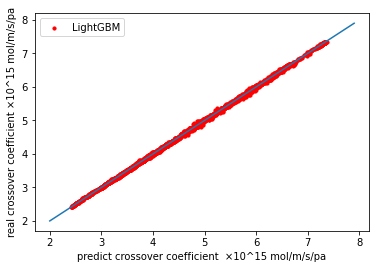

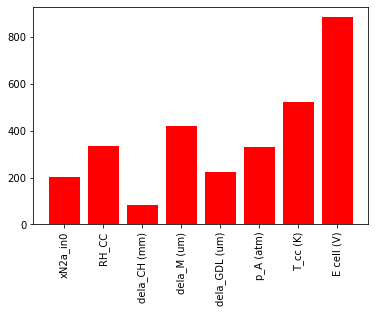

[203 336  84 421 222 329 521 884]


In [33]:


lgb_model=joblib.load('lgb_model')
algorithm_name='LightGBM'
result = lgb_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(2,8,0.1)
x_y_y=np.arange(2,8,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict crossover coefficient  ×10^15 mol/m/s/pa")
plt.ylabel(u"real crossover coefficient ×10^15 mol/m/s/pa")
plt.savefig('%s Crossover coefficient Regression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(lgb_model.feature_importances_)), lgb_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(lgb_model.feature_importances_)



In [34]:
lgb_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.2,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1,
 'reg_alpha': 0,
 'reg_lambda': 0,
 'silent': 'warn',
 'subsample': 0.5,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator RandomForestRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.


可决系数 r2_score_current:  0.9998677119485756
方差 rmse_val： 0.013397882596139818


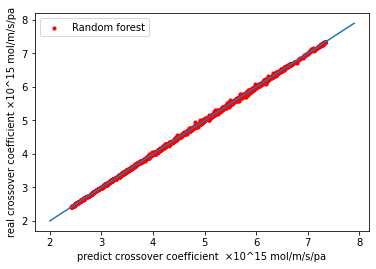

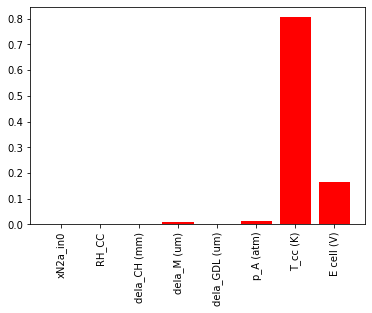

[4.97221809e-04 3.02192917e-03 8.22807055e-04 1.03751310e-02
 1.35963165e-03 1.30026030e-02 8.05631691e-01 1.65288986e-01]


In [35]:


rf_model=joblib.load('rf_model')
algorithm_name='Random forest'
result = rf_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(2,8,0.1)
x_y_y=np.arange(2,8,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict crossover coefficient  ×10^15 mol/m/s/pa")
plt.ylabel(u"real crossover coefficient ×10^15 mol/m/s/pa")
plt.savefig('%s Crossover coefficient Regression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(rf_model.feature_importances_)), rf_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(rf_model.feature_importances_)



可决系数 r2_score_current:  0.9999359322656424
方差 rmse_val： 0.009322184


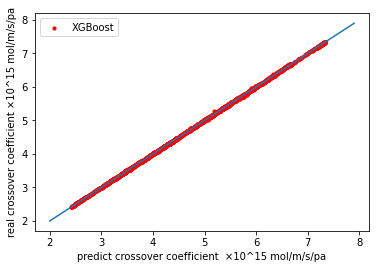

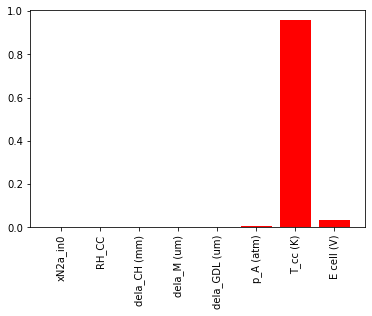

[4.2320552e-04 5.5768288e-04 4.8309020e-04 3.5675776e-03 3.8317317e-04
 5.8026402e-03 9.5639569e-01 3.2386974e-02]


In [2]:


xgb_model=joblib.load('xgb_model')
algorithm_name='XGBoost'
result = xgb_model.predict(X_test)
x_prediction=result
y_real=y_test_values
x_prediction_series=pd.Series(x_prediction)
y_real_series=pd.Series(y_real)
###########evaluating the regression quality##########

rmse_val= rmse(x_prediction,y_real)
r2_score_current=r2_score(x_prediction,y_real)
print('可决系数 r2_score_current: ',r2_score_current)
print('方差 rmse_val：',rmse_val)

###########generating a figure##########
x_y_x=np.arange(2,8,0.1)
x_y_y=np.arange(2,8,0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_prediction,y_real,color='red',s=10,label=algorithm_name)
ax.plot(x_y_x,x_y_y)
plt.legend()
plt.xlabel(u"predict crossover coefficient  ×10^15 mol/m/s/pa")
plt.ylabel(u"real crossover coefficient ×10^15 mol/m/s/pa")
plt.savefig('%s Crossover coefficient Regression.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
name_list=list(X_test)
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_,color='red',tick_label=name_list)
plt.xticks(rotation=90)
plt.savefig('%s FeatureImportance.jpg' %algorithm_name,bbox_inches = 'tight')
plt.show()
print(xgb_model.feature_importances_)



In [4]:
ff=[0.02,0.05,0.13,0.3,0.3,0.13,0.05,0.02]
E_cell=[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2]

No handles with labels found to put in legend.


Text(0, 0.5, 'weighted coefficient')

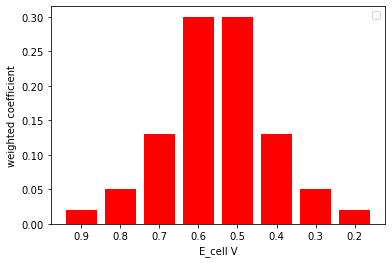

In [6]:
from matplotlib import pyplot
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)

plt.bar(range(len(ff)),ff,color='red',tick_label=E_cell)
plt.legend()
plt.xlabel(u"E_cell V")
plt.ylabel(u"weighted coefficient")